In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
import sys
sys.path.append("../")
from common import Toolkit

In [3]:
import numpy as np

In [4]:
import keras as ks

In [5]:
import matplotlib.pyplot as plt

In [6]:
from keras.callbacks import TensorBoard

In [7]:
import subprocess

In [8]:
import os

In [9]:
def copy_globals():
    glb = globals()
    
    def func():
        return glb
    
    return func

In [10]:
# ================================
# Part 1 - Vanilla MLP Autoencoder
# ================================

In [11]:
(x_train, _), (x_test, _) = mnist.load_data()

In [12]:
tk = Toolkit()
tk.set_global(copy_globals())
tk.batch_print_shape(x_train, x_test)

Shape
-----
x_train: (60000, 28, 28)
x_test: (10000, 28, 28)



In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  # flatten x_train
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))  # flatten x_test

In [14]:
tk.batch_print_shape(x_train, x_test)

Shape
-----
x_train: (60000, 784)
x_test: (10000, 784)



In [15]:
# Adapted from https://blog.keras.io/building-autoencoders-in-keras.html
encoding_dim = 32
input_img = ks.layers.Input(shape=(784,))  # input placeholder
encoded = ks.layers.Dense(encoding_dim, activation='relu')(input_img)  # encoded representation of the input
decoded = ks.layers.Dense(784, activation='sigmoid')(encoded)  # lossy reconstruction of the input
autoencoder = ks.models.Model(input_img, decoded)  # model that maps an input to its reconstruction

In [16]:
encoder = ks.models.Model(input_img, encoded)  # seperate encoder
encoded_input = ks.layers.Input(shape=(encoding_dim,))  # encoded input placeholder
decoder_layer = autoencoder.layers[-1]
decoder = ks.models.Model(encoded_input, decoder_layer(encoded_input))  # seperate decoder

In [17]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [18]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.3809 - val_loss: 0.2734
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.2665 - val_loss: 0.2565
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.2472 - val_loss: 0.2362
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.2290 - val_loss: 0.2194
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.2140 - val_loss: 0.2060
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.2022 - val_loss: 0.1958
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.1934 - val_loss: 0.1881
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 0.1864 - val_loss: 0.1817
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 0.1803 - val_loss: 0.1762
Epoch 10/50
60000/60000 [==============================] - 3s - loss: 0.1749 - val_loss: 0.1709

In [19]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

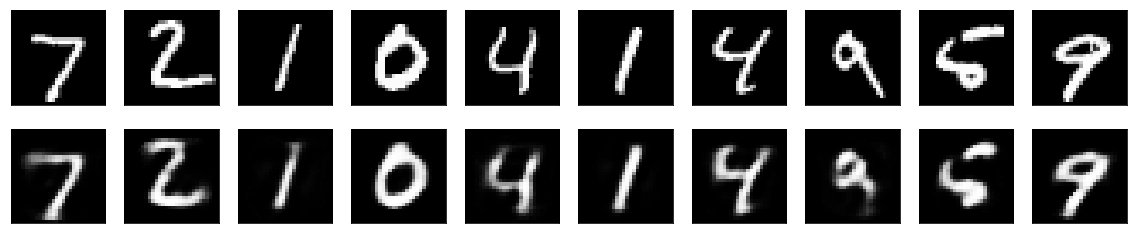

In [20]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
# ===============================
# Part 2 - Sparse MLP Autoencoder
# ===============================

In [22]:
encoding_dim_sparse = 32
input_img_sparse = ks.layers.Input(shape=(784,))
encoded_sparse = ks.layers.Dense(encoding_dim_sparse, activation='relu',
                activity_regularizer=ks.regularizers.l1(10e-6))(input_img_sparse)  # encoder layer with a L1 regularizer
decoded_sparse = ks.layers.Dense(784, activation='sigmoid')(encoded_sparse)
autoencoder_sparse = ks.models.Model(input_img_sparse, decoded_sparse)

encoder_sparse = ks.models.Model(input_img_sparse, encoded_sparse)  # seperate encoder
encoded_input_sparse = ks.layers.Input(shape=(encoding_dim_sparse,))  # encoded input placeholder
decoder_layer_sparse = autoencoder_sparse.layers[-1]
decoder_sparse = ks.models.Model(encoded_input_sparse, decoder_layer_sparse(encoded_input_sparse))  # seperate decoder

In [23]:
autoencoder_sparse.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_sparse.fit(x_train, x_train,
                       epochs=50,
                       batch_size=256,
                       shuffle=True,
                       validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.4218 - val_loss: 0.2963
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.2646 - val_loss: 0.2390
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.2298 - val_loss: 0.2203
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.2150 - val_loss: 0.2083
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.2049 - val_loss: 0.1997
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.1975 - val_loss: 0.1933
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.1919 - val_loss: 0.1882
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 0.1875 - val_loss: 0.1844
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 0.1841 - val_loss: 0.1813
Epoch 10/50
60000/60000 [==============================] - 3s - loss: 0.1814 - val_loss: 0.1787

In [24]:
encoded_imgs_sparse = encoder_sparse.predict(x_test)
decoded_imgs_sparse = decoder_sparse.predict(encoded_imgs_sparse)

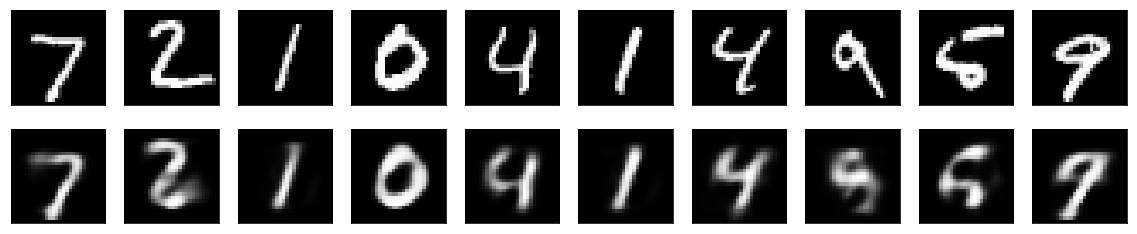

In [25]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_sparse[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
# ===============================
# Part 3 - Deep MLP Autoencoder
# ===============================

In [27]:
input_img_deep = ks.layers.Input(shape=(784,))
encoded_deep = ks.layers.Dense(128, activation='relu')(input_img_deep)
encoded_deep = ks.layers.Dense(64, activation='relu')(encoded_deep)
encoded_deep = ks.layers.Dense(32, activation='relu')(encoded_deep)

decoded_deep = ks.layers.Dense(64, activation='relu')(encoded_deep)
decoded_deep = ks.layers.Dense(128, activation='relu')(decoded_deep)
decoded_deep = ks.layers.Dense(784, activation='sigmoid')(decoded_deep)
autoencoder_deep = ks.models.Model(input_img_deep, decoded_deep)

In [28]:
encoder_deep = ks.models.Model(input_img_deep, encoded_deep)  # seperate encoder
encoded_input_deep = ks.layers.Input(shape=(32,))  # encoded input placeholder
decoder_layer_deep = encoded_input_deep
for i, layer in enumerate(autoencoder_deep.layers[-3:]):
    decoder_layer_deep = layer(decoder_layer_deep)
decoder_deep = ks.models.Model(encoded_input_deep, decoder_layer_deep)  # seperate decoder

In [29]:
autoencoder_deep.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_deep.fit(x_train, x_train,
                     epochs=50,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.3616 - val_loss: 0.2629
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.2559 - val_loss: 0.2454
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.2331 - val_loss: 0.2230
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.2151 - val_loss: 0.2079
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.2030 - val_loss: 0.1958
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.1926 - val_loss: 0.1859
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.1821 - val_loss: 0.1758
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.1749 - val_loss: 0.1712
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1690 - val_loss: 0.1648
Epoch 10/50
60000/60000 [==============================] - 4s - loss: 0.1634 - val_loss: 0.1598

In [30]:
encoded_imgs_deep = encoder_deep.predict(x_test)
decoded_imgs_deep = decoder_deep.predict(encoded_imgs_deep)

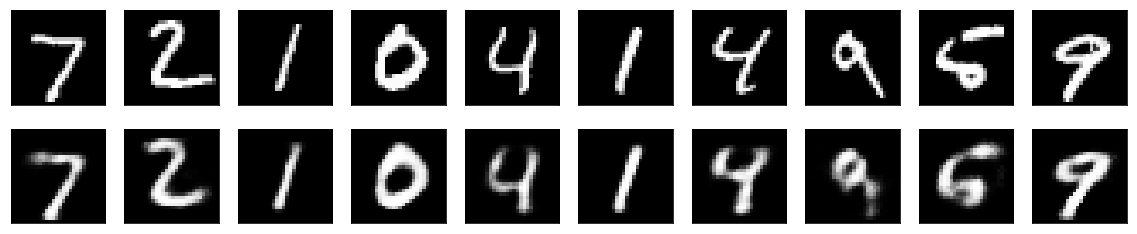

In [31]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_deep[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [32]:
# ===================================
# Part 4 -  Convolutional Autoencoder
# ===================================

In [33]:
sp = subprocess.Popen(["tensorboard", "--logdir=./log/"], stdout=subprocess.PIPE)

In [34]:
input_img_conv = ks.layers.Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = ks.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img_conv)
x = ks.layers.MaxPooling2D((2, 2), padding='same')(x)
x = ks.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = ks.layers.MaxPooling2D((2, 2), padding='same')(x)
x = ks.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded_conv = ks.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = ks.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_conv)
x = ks.layers.UpSampling2D((2, 2))(x)
x = ks.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = ks.layers.UpSampling2D((2, 2))(x)
x = ks.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = ks.layers.UpSampling2D((2, 2))(x)
decoded_conv = ks.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_conv = ks.models.Model(input_img_conv, decoded_conv)

In [35]:
autoencoder_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [36]:
encoder_conv = ks.models.Model(input_img_conv, encoded_conv)  # seperate encoder
encoded_input_conv = ks.layers.Input(shape=(4, 4, 8))   # encoded input placeholder
decoder_layer_conv = encoded_input_conv
for i, layer in enumerate(autoencoder_conv.layers[-7:]):
    decoder_layer_conv = layer(decoder_layer_conv)
decoder_conv = ks.models.Model(encoded_input_conv, decoder_layer_conv)  # seperate decoder

In [37]:
x_train_2d = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test_2d = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [38]:
autoencoder_conv.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_conv.fit(x_train_2d, x_train_2d,  # This is fucking slow on CPU, let's try GPU later
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_2d, x_test_2d),
                callbacks=[TensorBoard(log_dir='./log/')])  

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 96s - loss: 0.2309 - val_loss: 0.1813
Epoch 2/50
60000/60000 [==============================] - 96s - loss: 0.1651 - val_loss: 0.1526
Epoch 3/50
60000/60000 [==============================] - 96s - loss: 0.1472 - val_loss: 0.1413
Epoch 4/50
60000/60000 [==============================] - 96s - loss: 0.1373 - val_loss: 0.1311
Epoch 5/50
60000/60000 [==============================] - 96s - loss: 0.1306 - val_loss: 0.1270
Epoch 6/50
60000/60000 [==============================] - 96s - loss: 0.1258 - val_loss: 0.1202
Epoch 7/50
60000/60000 [==============================] - 96s - loss: 0.1224 - val_loss: 0.1215
Epoch 8/50
60000/60000 [==============================] - 96s - loss: 0.1197 - val_loss: 0.1180
Epoch 9/50
60000/60000 [==============================] - 96s - loss: 0.1174 - val_loss: 0.1162
Epoch 10/50
60000/60000 [==============================] - 97s - loss: 0.1159 - val_lo

In [39]:
try:
    sp.terminate()
except ProcessLookupError:
    pass

In [40]:
encoded_imgs_conv = encoder_conv.predict(x_test_2d)
decoded_imgs_conv = decoder_conv.predict(encoded_imgs_conv)

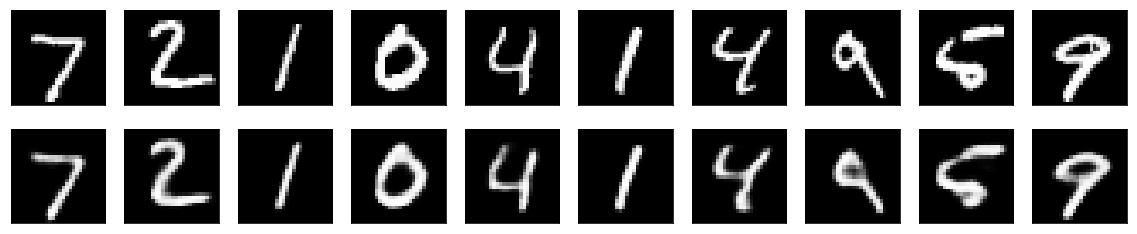

In [41]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
# ===============================================
# Part 4 -  Denoising (Convolutional) Autoencoder
# ===============================================

In [43]:
noise_factor = 0.5
x_train_2d_noisy = x_train_2d + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_2d.shape) 
x_test_2d_noisy = x_test_2d + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_2d.shape) 

x_train_2d_noisy = np.clip(x_train_2d_noisy, 0., 1.)
x_test_2d_noisy = np.clip(x_test_2d_noisy, 0., 1.)

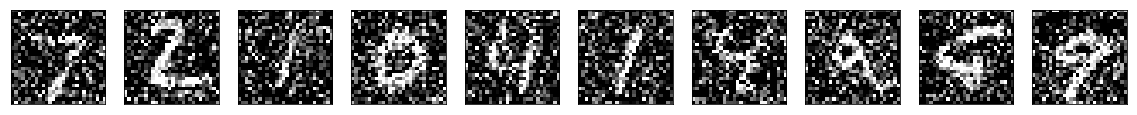

In [47]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_2d_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [49]:
# Use the convolutional autoencoder trained previously as a pretrained model
autoencoder_conv_d = ks.models.clone_model(autoencoder_conv)
autoencoder_conv_d.set_weights(autoencoder_conv.get_weights())  # copy weights
autoencoder_conv_d.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_conv_d.fit(x_train_2d_noisy, x_train_2d,
                       epochs=100,
                       batch_size=256,
                       shuffle=True,
                       validation_data=(x_test_2d_noisy, x_test_2d))
#                        callbacks=[TensorBoard(log_dir='./log/', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 86s - loss: 0.1605 - val_loss: 0.1511
Epoch 2/100
60000/60000 [==============================] - 85s - loss: 0.1452 - val_loss: 0.1436
Epoch 3/100
60000/60000 [==============================] - 85s - loss: 0.1402 - val_loss: 0.1362
Epoch 4/100
60000/60000 [==============================] - 85s - loss: 0.1374 - val_loss: 0.1372
Epoch 5/100
60000/60000 [==============================] - 87s - loss: 0.1353 - val_loss: 0.1370
Epoch 6/100
60000/60000 [==============================] - 87s - loss: 0.1336 - val_loss: 0.1339
Epoch 7/100
60000/60000 [==============================] - 87s - loss: 0.1327 - val_loss: 0.1336
Epoch 8/100
60000/60000 [==============================] - 87s - loss: 0.1312 - val_loss: 0.1302
Epoch 9/100
60000/60000 [==============================] - 89s - loss: 0.1303 - val_loss: 0.1289
Epoch 10/100
60000/60000 [==============================] - 89s - loss: 0.129

In [50]:
decoded_imgs_conv_d = autoencoder_conv_d.predict(x_test_2d_noisy)

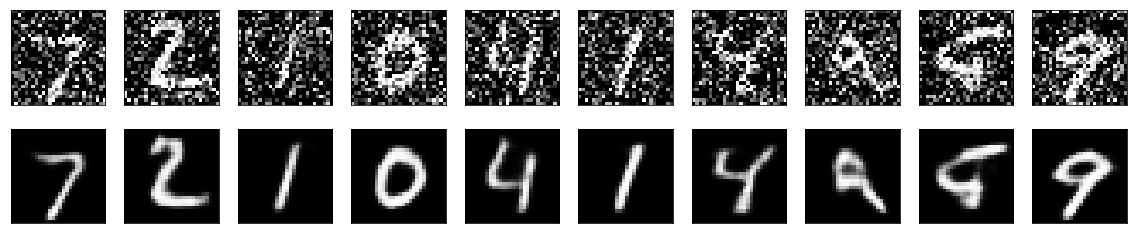

In [51]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_2d_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_conv_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [52]:
input_img_conv_d2 = ks.layers.Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = ks.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img_conv_d2)
x = ks.layers.MaxPooling2D((2, 2), padding='same')(x)
x = ks.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = ks.layers.MaxPooling2D((2, 2), padding='same')(x)
x = ks.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded_conv_d2 = ks.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = ks.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_conv_d2)
x = ks.layers.UpSampling2D((2, 2))(x)
x = ks.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = ks.layers.UpSampling2D((2, 2))(x)
x = ks.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = ks.layers.UpSampling2D((2, 2))(x)
decoded_conv_d2 = ks.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_conv_d2 = ks.models.Model(input_img_conv_d2, decoded_conv_d2)

In [53]:
encoder_conv_d2 = ks.models.Model(input_img_conv_d2, encoded_conv_d2)  # seperate encoder
encoded_input_conv_d2 = ks.layers.Input(shape=(4, 4, 8))   # encoded input placeholder
decoder_layer_conv_d2 = encoded_input_conv_d2
for i, layer in enumerate(autoencoder_conv_d2.layers[-7:]):
    decoder_layer_conv_d2 = layer(decoder_layer_conv_d2)
decoder_conv_d2 = ks.models.Model(encoded_input_conv_d2, decoder_layer_conv_d2)  # seperate decoder

In [55]:
# first 50 epoches
autoencoder_conv_d2.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_conv_d2.fit(x_train_2d_noisy, x_train_2d,  # This is fucking slow on CPU, let's try GPU later
                        epochs=50,
                        batch_size=128,
                        shuffle=True,
                        validation_data=(x_test_2d_noisy, x_test_2d),
                        callbacks=[ks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10)])
#                         callbacks=[TensorBoard(log_dir='./log/')])  

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 98s - loss: 0.2704 - val_loss: 0.2161
Epoch 2/50
60000/60000 [==============================] - 98s - loss: 0.2008 - val_loss: 0.1858
Epoch 3/50
60000/60000 [==============================] - 96s - loss: 0.1818 - val_loss: 0.1751
Epoch 4/50
60000/60000 [==============================] - 98s - loss: 0.1724 - val_loss: 0.1687
Epoch 5/50
60000/60000 [==============================] - 96s - loss: 0.1663 - val_loss: 0.1612
Epoch 6/50
60000/60000 [==============================] - 96s - loss: 0.1612 - val_loss: 0.1570
Epoch 7/50
60000/60000 [==============================] - 97s - loss: 0.1578 - val_loss: 0.1543
Epoch 8/50
60000/60000 [==============================] - 96s - loss: 0.1547 - val_loss: 0.1509
Epoch 9/50
60000/60000 [==============================] - 97s - loss: 0.1524 - val_loss: 0.1486
Epoch 10/50
60000/60000 [==============================] - 97s - loss: 0.1502 - val_lo

In [56]:
encoded_imgs_conv_d2 = encoder_conv.predict(x_test_2d_noisy)
decoded_imgs_conv_d2 = decoder_conv.predict(encoded_imgs_conv_d2)

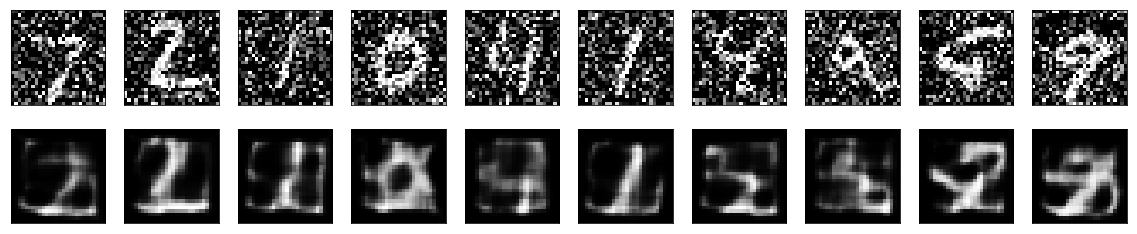

In [57]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_2d_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_conv_d2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [66]:
# 100 more epochs for comparison with pretrained model
# Due to some reason I clear the output, but the model is already trained for 100 more epoches, let's see the outcome
autoencoder_conv_d2.fit(x_train_2d_noisy, x_train_2d,  # This is fucking slow on CPU, let's try GPU later
                        epochs=100,
                        batch_size=128,
                        shuffle=True,
                        validation_data=(x_test_2d_noisy, x_test_2d),
                        callbacks=[ks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10)])
#                         callbacks=[TensorBoard(log_dir='./log/')])  

In [67]:
encoded_imgs_conv_d2 = encoder_conv.predict(x_test_2d_noisy)
decoded_imgs_conv_d2 = decoder_conv.predict(encoded_imgs_conv_d2)

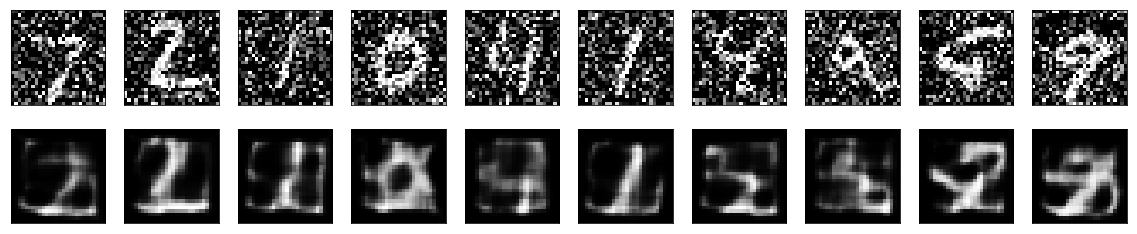

In [68]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_2d_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_conv_d2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [70]:
train_loss = autoencoder_conv_d2.evaluate(x_train_2d_noisy, x_train_2d) 
valid_loss = autoencoder_conv_d2.evaluate(x_test_2d_noisy, x_test_2d)
print()
print("train_loss: {}, valid_loss: {}".format(train_loss, valid_loss))  # see? the losses drops compared with the 50th epoch

 9888/10000 [============================>.] - ETA: 0s
train_loss: 0.12035187985897064, valid_loss: 0.11942175211906433
